In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve,auc

In [154]:
df=pd.read_csv(r"C:\Users\user\Downloads\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Checking nulls

In [3]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

None of the features has null values.

In [4]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

## Analysing categorical data

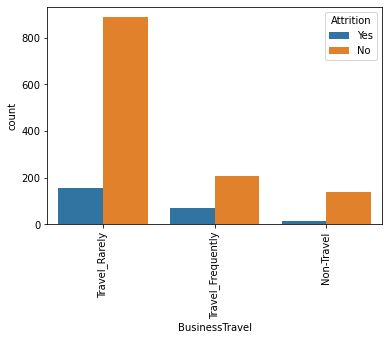

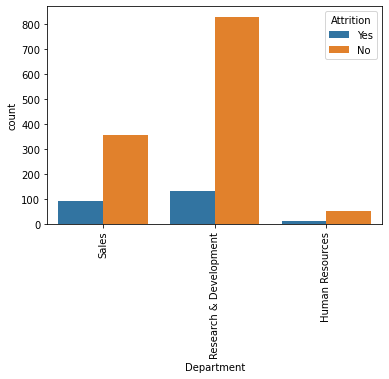

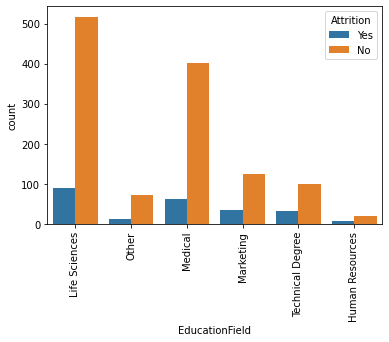

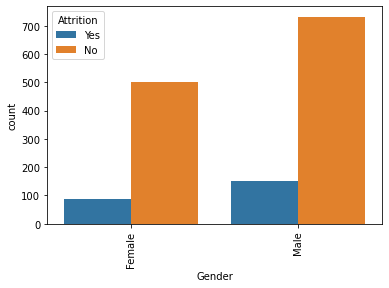

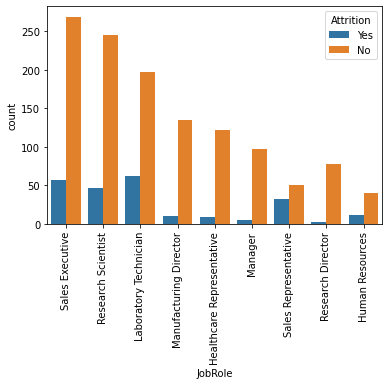

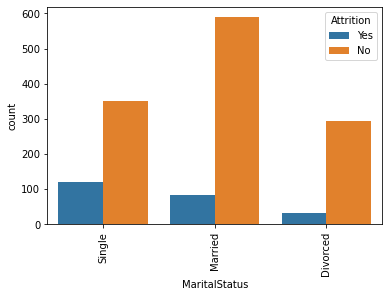

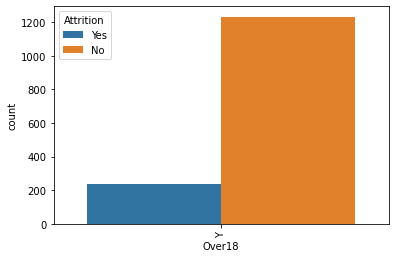

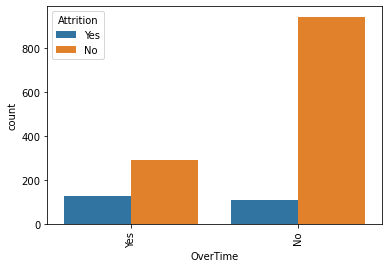

In [10]:
category=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
#Plotting count plot for each feature
for i in category:
    a=sns.countplot(x=df[i],hue=df['Attrition'],data=df)
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

Observation:

    1) Business Travel:
        Travel rarely: attrition yes-180(16.6%)
                       attrition no-900(83.33%)
        Travel_Frequently: attrition yes-80(28%)
                           attrition no-200(72%)
        Non-Travel: attrition yes-25(16.6%)
                    attrition no-125(83.3%)
            
        Travel doesnot have much effect on attrition.
        
    2)Department:
        Sales: attrition yes-100(22.2%)
               attrition no-350(78.8%)
        Research & Development: attrition yes-125(13.5%)
                           attrition no-825(86.5%)
        Human Resource: attrition yes-15(23%)
                    attrition no-50(77%)
        Attrition rate is higher in human resource department as compared to others and retention rate is higher in research & Development.
        
    3)Education Feild: We could see that Marketing, Technical Degree and Human Resource has maximum attrition rate.
    
    4)Gender: Females has higher attrition rate then Males
    
    5)Job Role:Laboratory Technician, Sales Representative and Human Resources has highest attrition rate.
    
    6)Marital status: Single has highest attrition rate and lest is among married employees.
    
    7)Overtime: Highest attrition rate is among the employees who do overtime.

In [12]:
df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [14]:
df['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [20]:
df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

Over18,StandardHours and EmployeeCount feature has just one type of value and its obvious that all the employees will be over 18, StandardHours and EmployeeCount will always be 1 so we would delete these feature.

In [155]:
df=df.drop(['Over18','EmployeeCount','StandardHours'],axis=1)

## Analysing Continuous Data

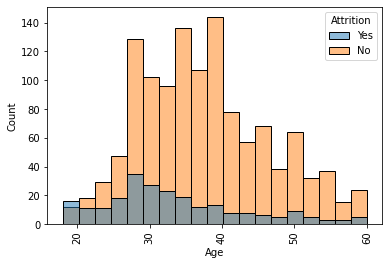

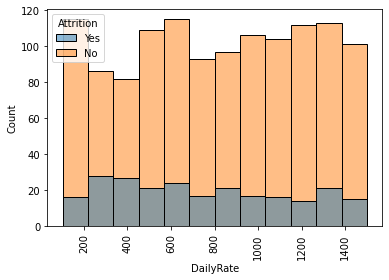

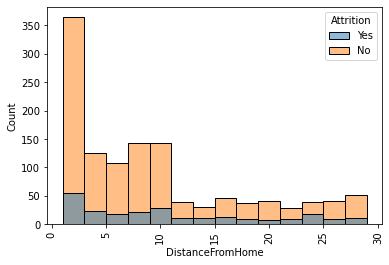

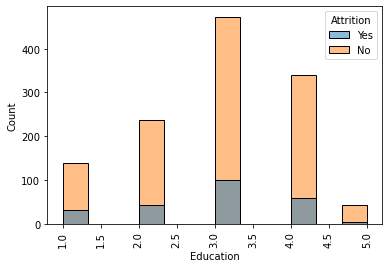

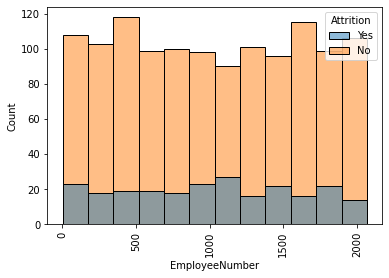

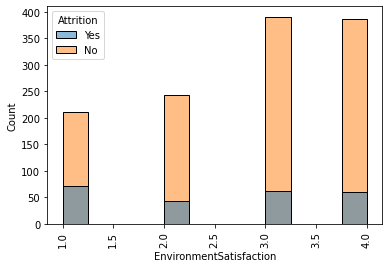

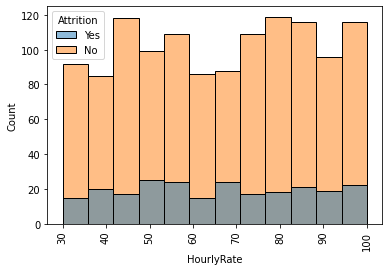

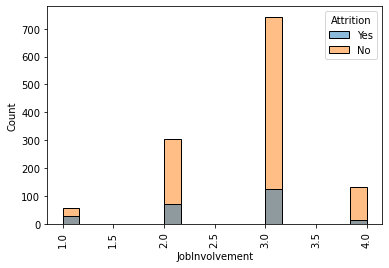

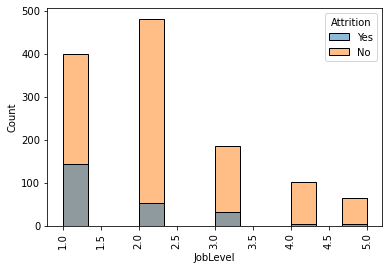

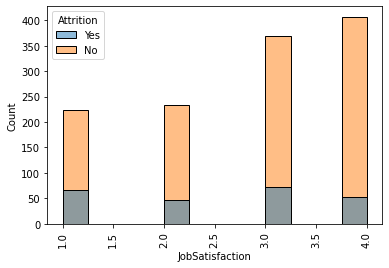

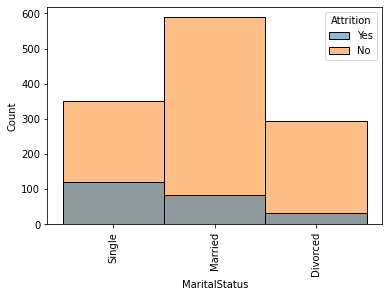

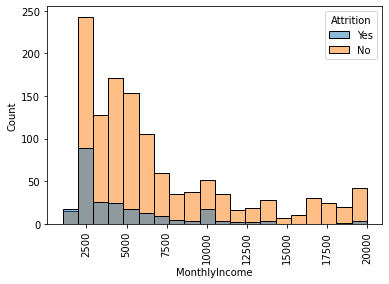

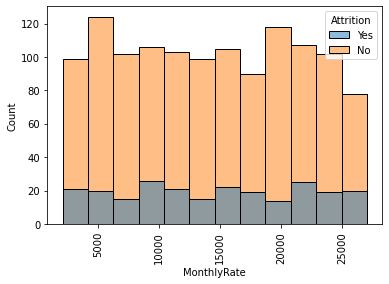

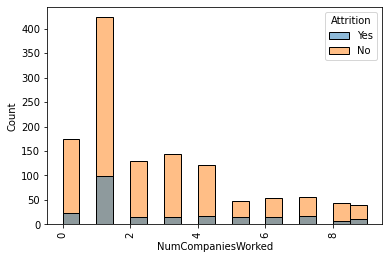

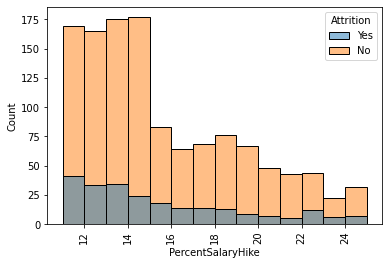

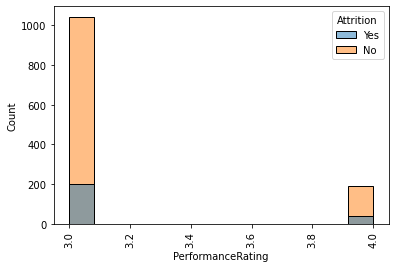

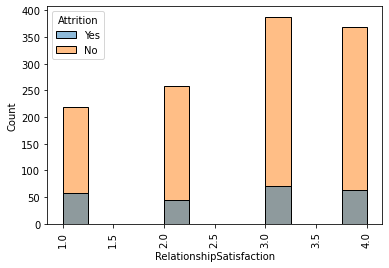

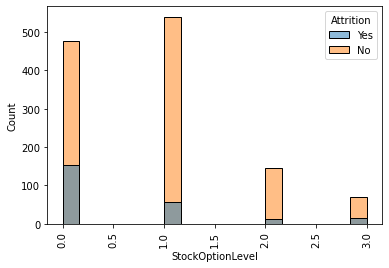

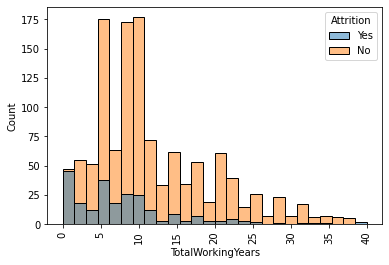

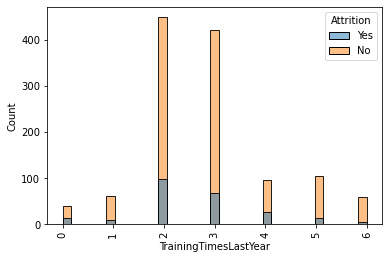

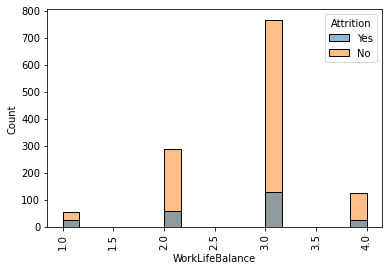

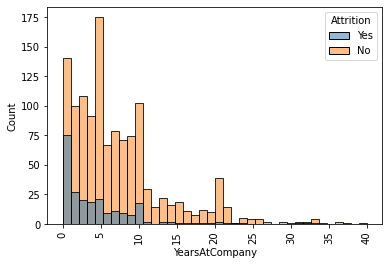

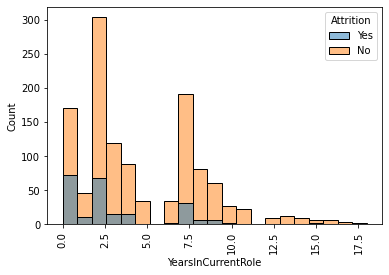

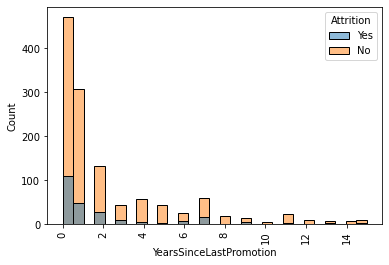

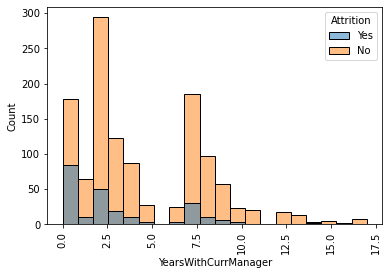

In [24]:
#Plotting Count plot
col=['Age','DailyRate','DistanceFromHome','Education','EmployeeNumber','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MaritalStatus','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
for i in col:
    a=sns.histplot(x=df[i],hue=df['Attrition'],data=df)
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

## Encoding Object data

In [156]:
#Using ordinal encoder
oe=OrdinalEncoder()
df1=oe.fit_transform(df[['BusinessTravel']])
df['BusinessTravel']=df1
df2=oe.fit_transform(df[['Department']])
df['Department']=df2
df3=oe.fit_transform(df[['EducationField']])
df['EducationField']=df3
df1=oe.fit_transform(df[['Gender']])
df['Gender']=df1
df2=oe.fit_transform(df[['JobRole']])
df['JobRole']=df2
df1=oe.fit_transform(df[['MaritalStatus']])
df['MaritalStatus']=df1
df1=oe.fit_transform(df[['OverTime']])
df['OverTime']=df1
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,2.0,1102,2.0,1,2,1.0,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,1.0,279,1.0,8,1,1.0,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,2.0,1373,1.0,2,2,4.0,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,1.0,1392,1.0,3,4,1.0,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,2.0,591,1.0,2,1,3.0,7,1,...,3,4,1,6,3,3,2,2,2,2


## Label Encoding for Attrition

In [157]:
le=LabelEncoder()
df1=le.fit_transform(df['Attrition'])
df['Attrition']=df1
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,7,1,...,3,4,1,6,3,3,2,2,2,2


## Analysing Relation between features and label

In [118]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1024.865306,2.721769,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,602.024335,1.093082,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,491.250000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1020.500000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1555.750000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,2068.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [41]:
df.corr().abs()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.159205,0.024751,0.010661,0.031882,0.001686,0.208034,0.040873,0.010145,0.010146,...,0.001904,0.053535,0.037510,0.680381,0.019621,0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,0.159205,1.000000,0.000074,0.056652,0.063991,0.077924,0.031373,0.026846,0.010577,0.103369,...,0.002889,0.045872,0.137145,0.171063,0.059478,0.063939,0.134392,0.160545,0.033019,0.156199
BusinessTravel,0.024751,0.000074,1.000000,0.004086,0.009044,0.024469,0.000757,0.023724,0.015578,0.004174,...,0.026341,0.035986,0.016727,0.034226,0.015240,0.011256,0.014575,0.011497,0.032591,0.022636
DailyRate,0.010661,0.056652,0.004086,1.000000,0.007109,0.004985,0.016806,0.037709,0.050990,0.018355,...,0.000473,0.007846,0.042143,0.014515,0.002453,0.037848,0.034055,0.009932,0.033229,0.026363
Department,0.031882,0.063991,0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,0.010895,0.019395,...,0.024604,0.022414,0.012193,0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,0.001686,0.077924,0.024469,0.004985,0.017225,1.000000,0.021042,0.002013,0.032916,0.016075,...,0.027110,0.006557,0.044872,0.004628,0.036942,0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,0.031373,0.000757,0.016806,0.007996,0.021042,1.000000,0.039592,0.042070,0.027128,...,0.024539,0.009118,0.018422,0.148280,0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,0.039592,1.000000,0.002516,0.043163,...,0.005614,0.004378,0.016185,0.027848,0.049195,0.041191,0.018692,0.010506,0.002326,0.004130
EmployeeNumber,0.010145,0.010577,0.015578,0.050990,0.010895,0.032916,0.042070,0.002516,1.000000,0.017621,...,0.020359,0.069861,0.062227,0.014365,0.023603,0.010309,0.011240,0.008416,0.009019,0.009197
EnvironmentSatisfaction,0.010146,0.103369,0.004174,0.018355,0.019395,0.016075,0.027128,0.043163,0.017621,1.000000,...,0.029548,0.007665,0.003432,0.002693,0.019359,0.027627,0.001458,0.018007,0.016194,0.004999


<AxesSubplot:>

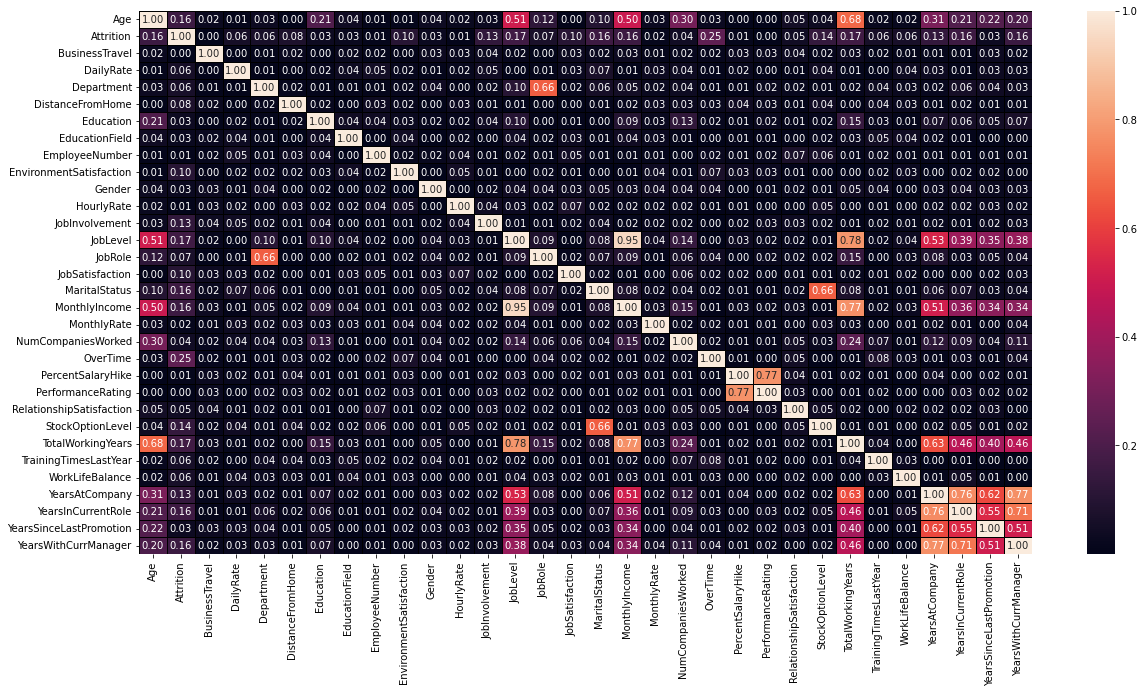

In [29]:
# Plotting heat map for better analysis
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')

Observation: Ther could be multicolinearity between JobLevel and MonthlyIncome. So we would cross check this using VIF.

## VIF

In [158]:
x=df.drop(['Attrition'],axis=1)
y=df['Attrition']

In [159]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,vif,features
0,33.328299,Age
1,6.744893,BusinessTravel
2,4.978740,DailyRate
3,12.973763,Department
4,2.320507,DistanceFromHome
5,9.487323,Education
6,3.867284,EducationField
7,3.927940,EmployeeNumber
8,7.123545,EnvironmentSatisfaction
9,2.510511,Gender


## Checking Outliers

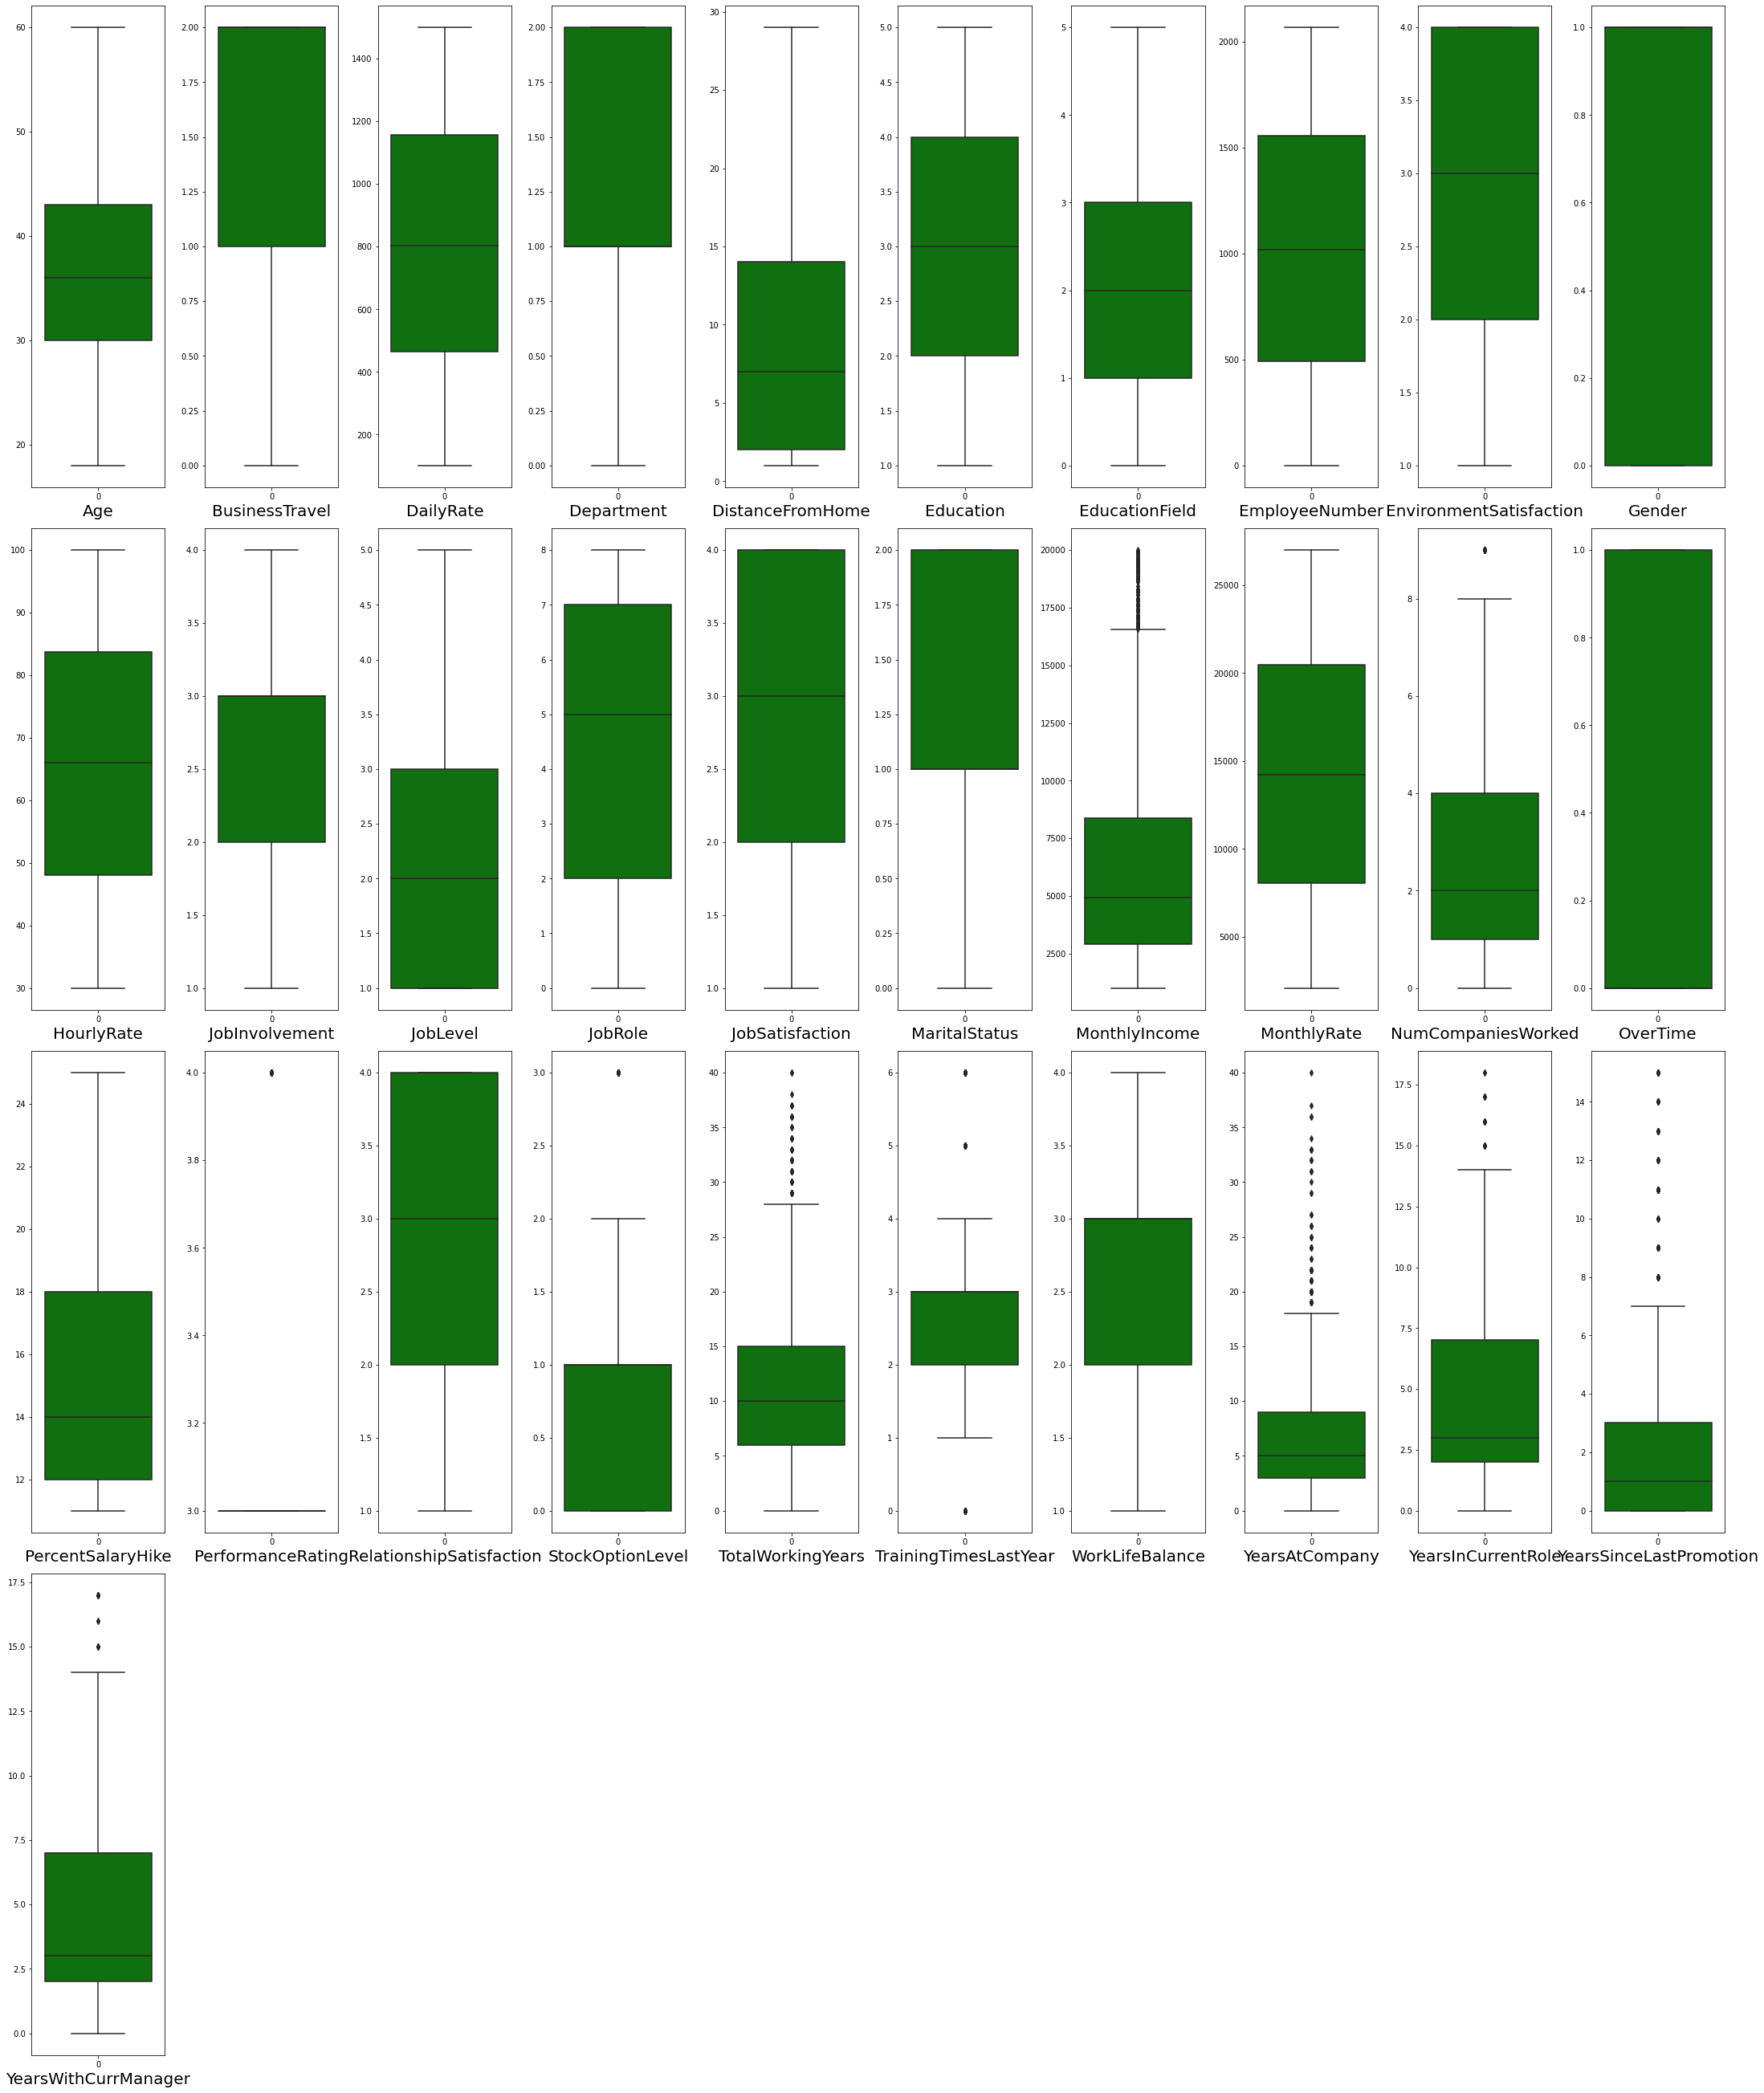

In [55]:
col=x.columns
plt.figure(figsize=(30,90))
for i in range(len(col)):
    plt.subplot(10,10,i+1)
    sns.boxplot(data=x[col[i]],color='green',orient='v')
    plt.xlabel(col[i],fontsize=20)
    plt.tight_layout()

Observation: We could see outliers in MonthlyIncome, NumCompaniesWorked, StockOptionLevel,TotalWorkingYears, TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager

## Checking Skewness

In [56]:
x.skew()

Age                         0.413286
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

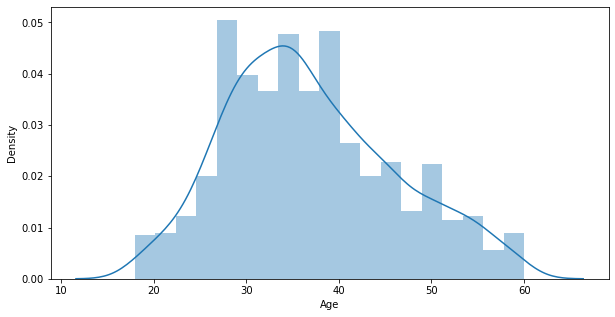

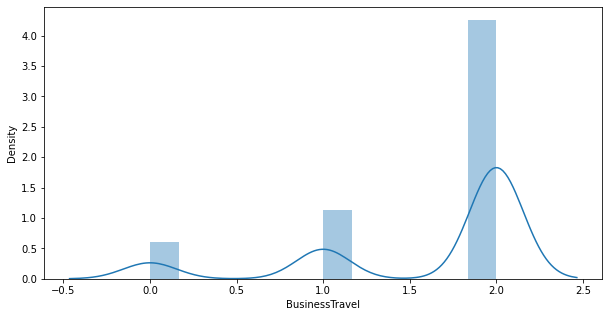

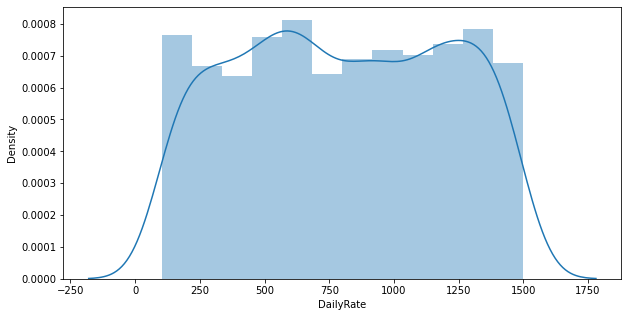

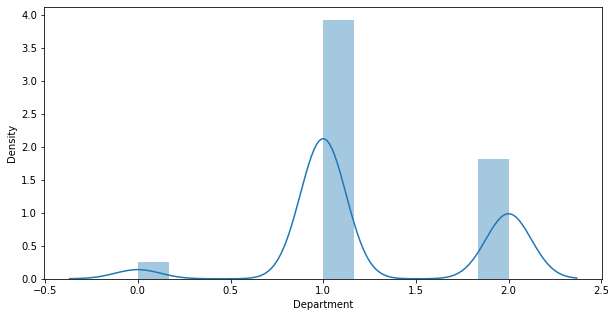

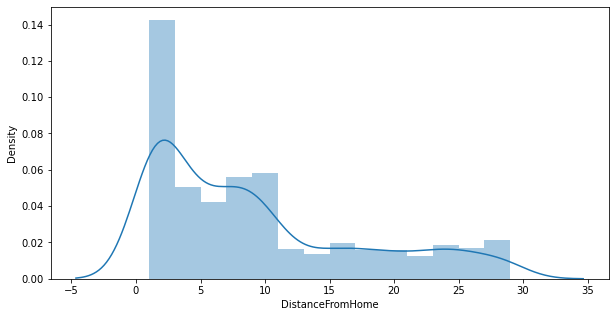

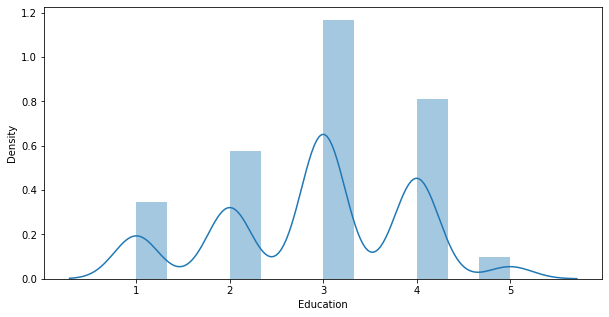

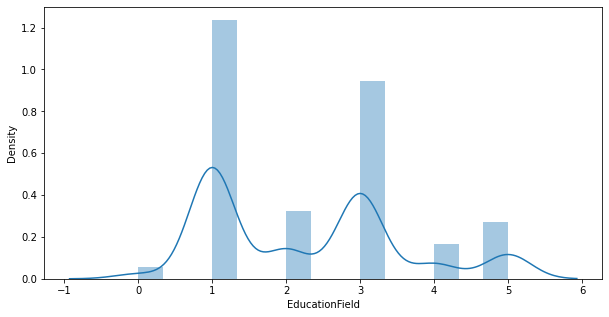

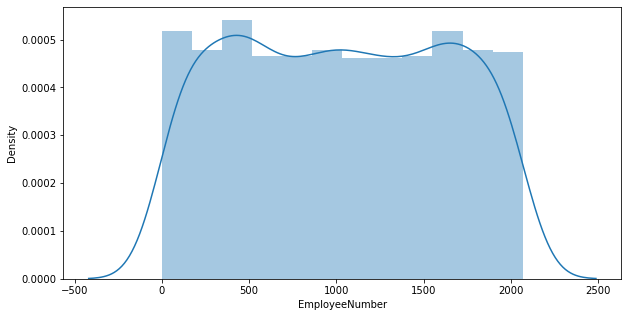

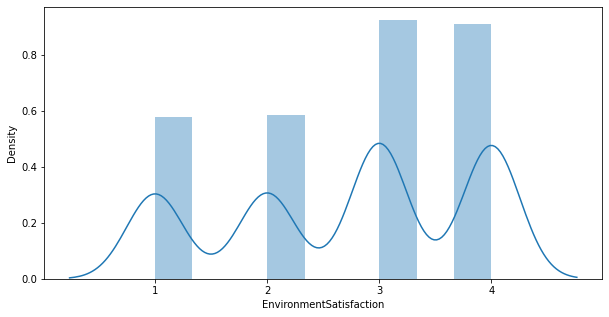

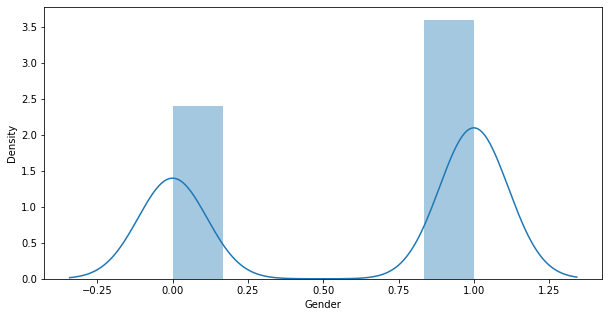

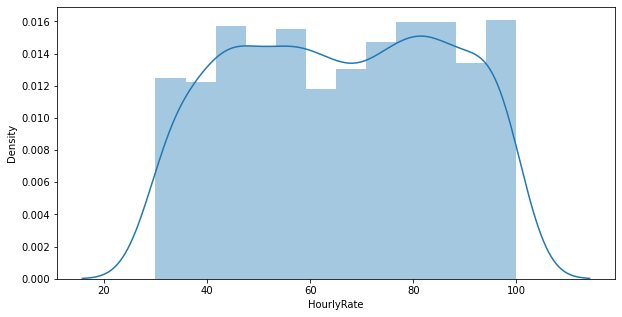

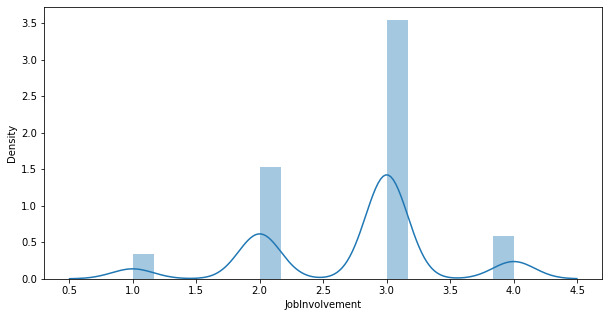

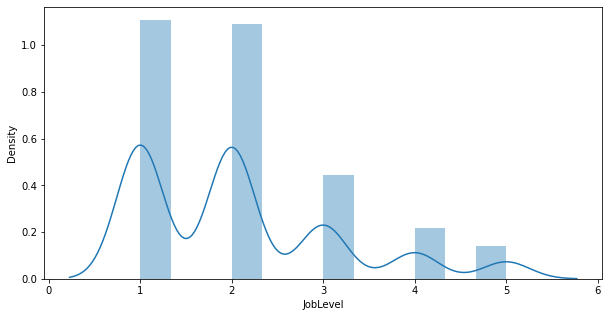

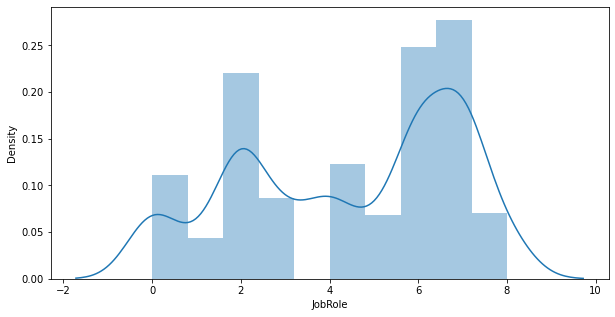

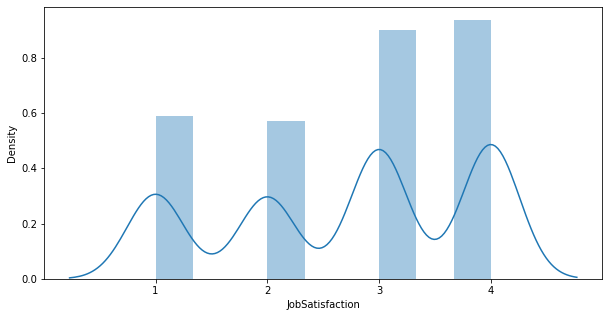

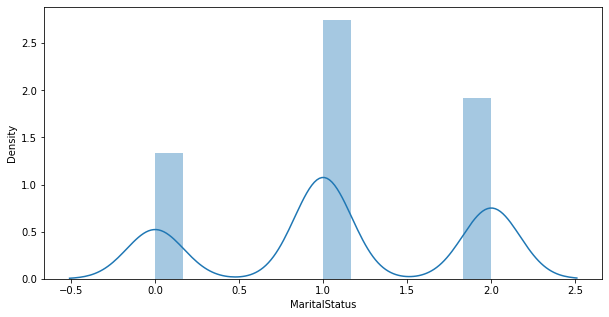

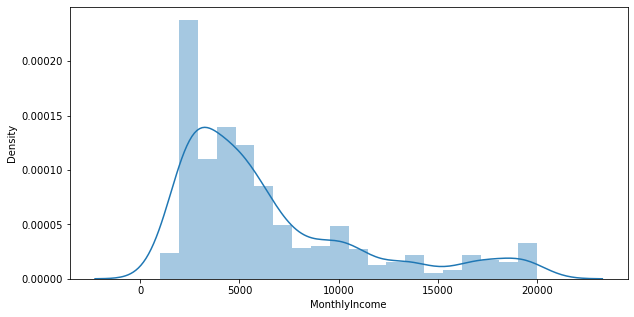

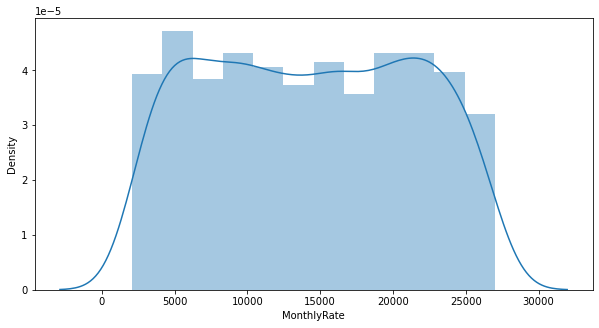

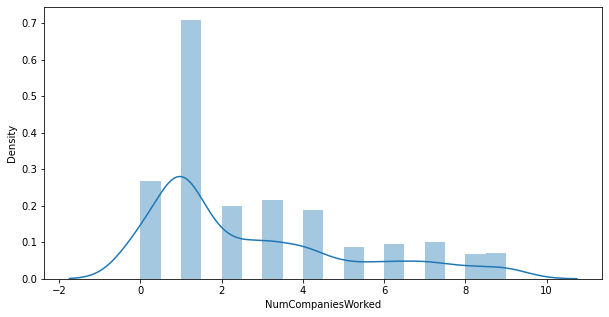

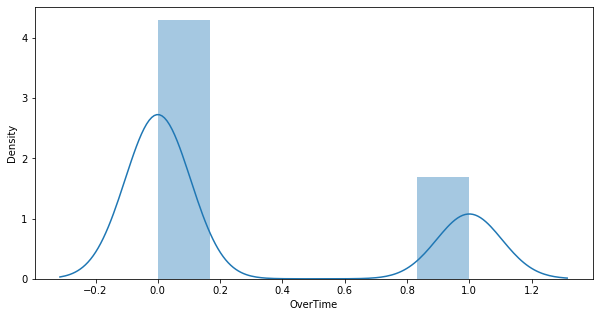

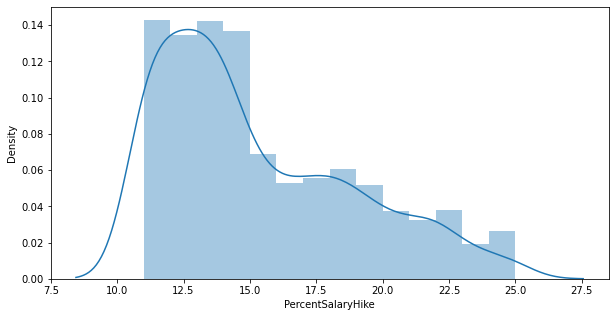

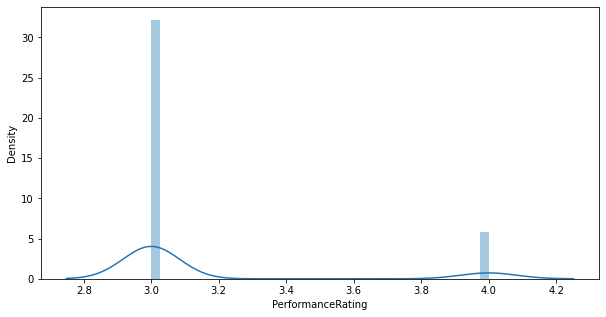

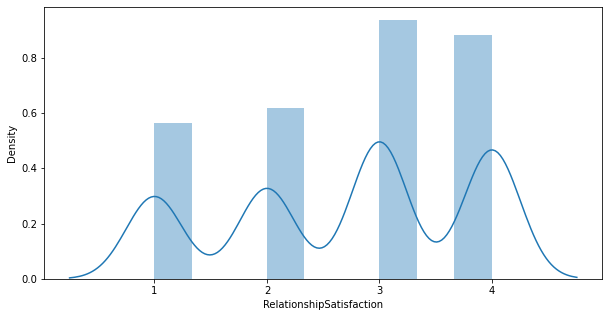

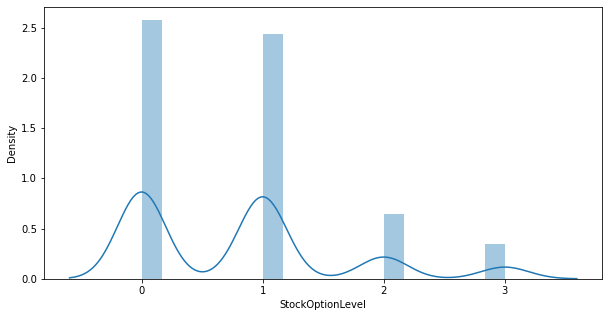

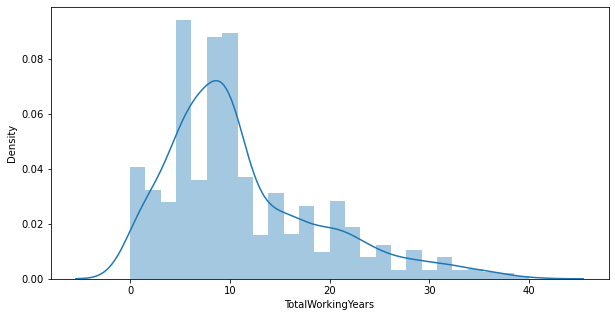

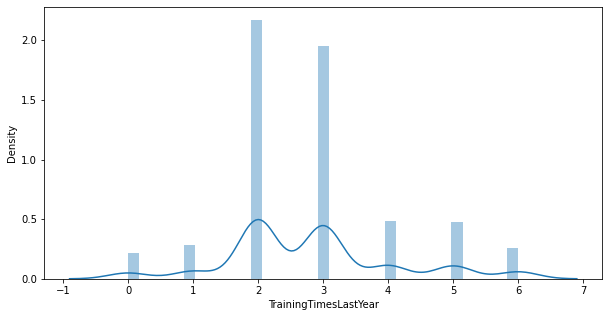

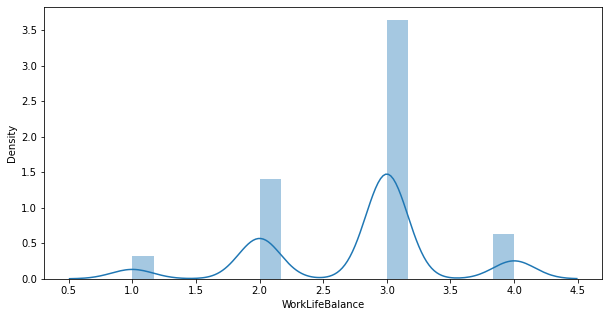

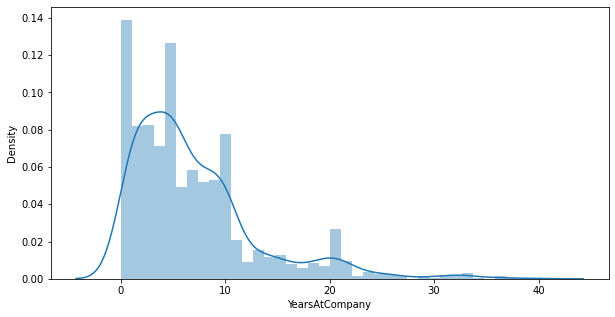

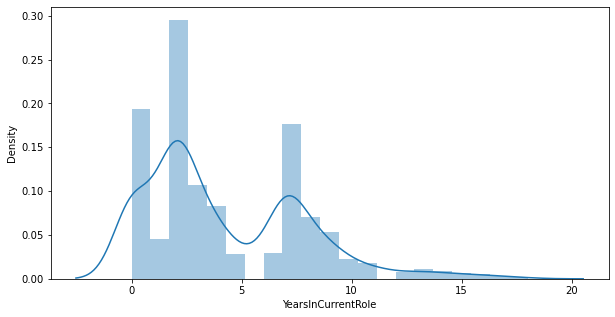

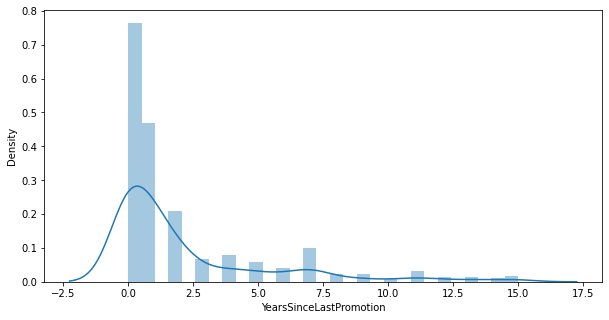

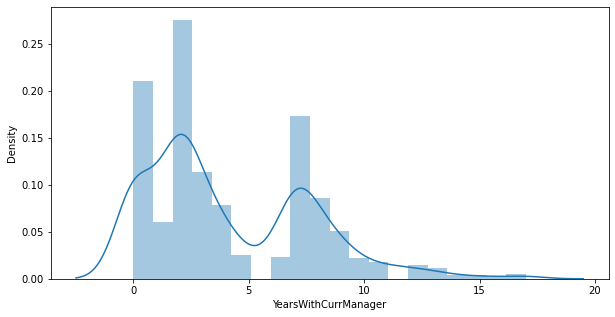

In [67]:
# Ploting Distribution plot to cross check skewness
import warnings
warnings.filterwarnings('ignore')
col=x.columns
# for feature Length
for i in range(len(x.columns)):
    plt.figure(figsize=(10,5))
    sns.distplot(x[col[i]])
    plt.xlabel(col[i],fontsize=10)
    

Our obervation is correct.

## Removing multicollinearity

Since PerformanceRating is having highest VIF and is also not realted to Attrition we would drop it and check VIF again.

In [160]:
x=x.drop(['PerformanceRating'],axis=1)
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2.0,1102,2.0,1,2,1.0,1,2,0.0,...,11,1,0,8,0,1,6,4,0,5
1,49,1.0,279,1.0,8,1,1.0,2,3,1.0,...,23,4,1,10,3,3,10,7,1,7
2,37,2.0,1373,1.0,2,2,4.0,4,4,1.0,...,15,2,0,7,3,3,0,0,0,0
3,33,1.0,1392,1.0,3,4,1.0,5,4,0.0,...,11,3,0,8,3,3,8,7,3,0
4,27,2.0,591,1.0,2,1,3.0,7,1,1.0,...,12,4,1,6,3,3,2,2,2,2


In [122]:
#Checking VIF again
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,vif,features
0,32.386981,Age
1,6.634344,BusinessTravel
2,4.948019,DailyRate
3,12.953373,Department
4,2.318028,DistanceFromHome
5,9.428175,Education
6,3.836190,EducationField
7,3.905631,EmployeeNumber
8,7.024610,EnvironmentSatisfaction
9,2.499924,Gender


Now we could observe highest VIF in JobLevel feature so lets drop it as well.

In [161]:
x=x.drop(['JobLevel'],axis=1)
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2.0,1102,2.0,1,2,1.0,1,2,0.0,...,11,1,0,8,0,1,6,4,0,5
1,49,1.0,279,1.0,8,1,1.0,2,3,1.0,...,23,4,1,10,3,3,10,7,1,7
2,37,2.0,1373,1.0,2,2,4.0,4,4,1.0,...,15,2,0,7,3,3,0,0,0,0
3,33,1.0,1392,1.0,3,4,1.0,5,4,0.0,...,11,3,0,8,3,3,8,7,3,0
4,27,2.0,591,1.0,2,1,3.0,7,1,1.0,...,12,4,1,6,3,3,2,2,2,2


In [71]:
#Checking VIF again
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,vif,features
0,32.252689,Age
1,6.632630,BusinessTravel
2,4.948018,DailyRate
3,12.275072,Department
4,2.307232,DistanceFromHome
5,9.423186,Education
6,3.835783,EducationField
7,3.905614,EmployeeNumber
8,7.007662,EnvironmentSatisfaction
9,2.499901,Gender


In [ ]:
Next highest VIF score is of Age feature so now lets drop it and check VIF again.

In [162]:
x=x.drop(['Age'],axis=1)
x.head()

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2.0,1102,2.0,1,2,1.0,1,2,0.0,94,...,11,1,0,8,0,1,6,4,0,5
1,1.0,279,1.0,8,1,1.0,2,3,1.0,61,...,23,4,1,10,3,3,10,7,1,7
2,2.0,1373,1.0,2,2,4.0,4,4,1.0,92,...,15,2,0,7,3,3,0,0,0,0
3,1.0,1392,1.0,3,4,1.0,5,4,0.0,56,...,11,3,0,8,3,3,8,7,3,0
4,2.0,591,1.0,2,1,3.0,7,1,1.0,40,...,12,4,1,6,3,3,2,2,2,2


In [125]:
#Checking VIF again
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,vif,features
0,6.603932,BusinessTravel
1,4.942336,DailyRate
2,12.251575,Department
3,2.306804,DistanceFromHome
4,9.048630,Education
5,3.834355,EducationField
6,3.899157,EmployeeNumber
7,6.948947,EnvironmentSatisfaction
8,2.496416,Gender
9,10.790217,HourlyRate


Now highest VIF is of PercentSalaryHike which is only 1% related to Attrition and it has skewness as well so we would drop it and check VIF again.

In [163]:
x=x.drop(['PercentSalaryHike'],axis=1)
x.head()

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2.0,1102,2.0,1,2,1.0,1,2,0.0,94,...,1.0,1,0,8,0,1,6,4,0,5
1,1.0,279,1.0,8,1,1.0,2,3,1.0,61,...,0.0,4,1,10,3,3,10,7,1,7
2,2.0,1373,1.0,2,2,4.0,4,4,1.0,92,...,1.0,2,0,7,3,3,0,0,0,0
3,1.0,1392,1.0,3,4,1.0,5,4,0.0,56,...,1.0,3,0,8,3,3,8,7,3,0
4,2.0,591,1.0,2,1,3.0,7,1,1.0,40,...,0.0,4,1,6,3,3,2,2,2,2


In [75]:
#Checking VIF again
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,vif,features
0,6.576945,BusinessTravel
1,4.897888,DailyRate
2,12.235209,Department
3,2.294250,DistanceFromHome
4,8.986195,Education
5,3.825919,EducationField
6,3.890880,EmployeeNumber
7,6.920541,EnvironmentSatisfaction
8,2.486071,Gender
9,10.650791,HourlyRate


Now all the VIF score is below 15 so good to proceed now.

## Removing Outliers

In [164]:
#Getting sure of outliers using z score

z=np.abs(zscore(x))
i=np.where(z>3)
print("Outliers index-\n",set(i[0]))
print("\n\nNumber of rows to be eliminated-\n",len(set(i[0])))

Outliers index-
 {1024, 1043, 535, 28, 45, 561, 1078, 62, 63, 64, 1086, 1093, 584, 592, 595, 85, 1111, 1116, 98, 616, 110, 1135, 624, 1138, 635, 123, 126, 1156, 653, 153, 1184, 677, 686, 178, 187, 701, 190, 1221, 1223, 716, 218, 1242, 231, 746, 237, 749, 752, 270, 1295, 1301, 1303, 281, 799, 1327, 1331, 1348, 326, 838, 1351, 861, 875, 1401, 894, 386, 1414, 401, 914, 918, 1430, 922, 411, 926, 425, 937, 427, 956, 445, 962, 976, 466, 473, 477, 1008}


Number of rows to be eliminated-
 83


In [146]:
x.shape

(1470, 27)

In [147]:
#Calculating Data Loss
loss=((1470-83)/1470)*100
print("The data loss-",100-loss,"%")

The data loss- 5.646258503401356 %


We could bear with 5% data loss so lets drop these rows.

In [165]:
#removing rows with outliers
x=x.drop(x.index[i[0]])
x

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2.0,1102,2.0,1,2,1.0,1,2,0.0,94,...,1.0,1,0,8,0,1,6,4,0,5
1,1.0,279,1.0,8,1,1.0,2,3,1.0,61,...,0.0,4,1,10,3,3,10,7,1,7
2,2.0,1373,1.0,2,2,4.0,4,4,1.0,92,...,1.0,2,0,7,3,3,0,0,0,0
3,1.0,1392,1.0,3,4,1.0,5,4,0.0,56,...,1.0,3,0,8,3,3,8,7,3,0
4,2.0,591,1.0,2,1,3.0,7,1,1.0,40,...,0.0,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1.0,884,1.0,23,2,3.0,2061,3,1.0,41,...,0.0,3,1,17,3,3,5,2,0,3
1466,2.0,613,1.0,6,1,3.0,2062,4,1.0,42,...,0.0,1,1,9,5,3,7,7,1,7
1467,2.0,155,1.0,4,3,1.0,2064,2,1.0,87,...,1.0,2,1,6,0,3,6,2,0,3
1468,1.0,1023,2.0,2,3,3.0,2065,4,1.0,63,...,0.0,4,0,17,3,2,9,6,0,8


In [166]:
#removing rows with outliers
y=y.drop(y.index[i[0]])
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1387, dtype: int32

## Checking dataset is balanced or not

In [167]:
y.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

Observation: Data seems to be imbalanced so we need to balance it by Upsampling.

In [168]:
x['Attrition']=y

In [169]:
from sklearn.utils import resample

NoAttrition=x[x.Attrition==0]
YesAttrition=x[x.Attrition==1]
Yes_upsampled=resample(YesAttrition,replace=True,n_samples=len(NoAttrition),random_state=27)
df_up=pd.concat([NoAttrition,Yes_upsampled])
df_up['Attrition'].value_counts()

0    1158
1    1158
Name: Attrition, dtype: int64

In [172]:
y=df_up['Attrition']
y

1       0
3       0
4       0
5       0
6       0
       ..
415     1
540     1
1205    1
21      1
836     1
Name: Attrition, Length: 2316, dtype: int32

In [173]:
x=df_up.drop(['Attrition'],axis=1)
x

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,1.0,279,1.0,8,1,1.0,2,3,1.0,61,...,0.0,4,1,10,3,3,10,7,1,7
3,1.0,1392,1.0,3,4,1.0,5,4,0.0,56,...,1.0,3,0,8,3,3,8,7,3,0
4,2.0,591,1.0,2,1,3.0,7,1,1.0,40,...,0.0,4,1,6,3,3,2,2,2,2
5,1.0,1005,1.0,2,2,1.0,8,4,1.0,79,...,0.0,3,0,8,2,2,7,7,3,6
6,2.0,1324,1.0,3,3,3.0,10,3,0.0,81,...,1.0,1,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,1.0,296,2.0,6,2,2.0,555,4,0.0,33,...,0.0,4,1,3,3,2,2,2,1,0
540,2.0,654,1.0,1,2,1.0,741,1,0.0,67,...,1.0,4,0,10,4,3,7,7,3,7
1205,2.0,1259,1.0,2,4,1.0,1692,4,1.0,95,...,0.0,1,0,1,2,3,1,0,0,0
21,2.0,1218,2.0,9,4,1.0,27,3,1.0,82,...,0.0,2,0,10,4,3,5,3,0,3


## Removing Skewness

In [174]:
#using yeo-johnson transformation
x=power_transform(x,method='yeo-johnson')
x

array([[-1.30571739, -1.32891811, -0.51604887, ...,  1.16028232,
         0.26473906,  1.13111   ],
       [-1.30571739,  1.41216264, -0.51604887, ...,  1.16028232,
         1.0678012 , -1.36030773],
       [ 0.67880219, -0.42950802, -0.51604887, ..., -0.16642158,
         0.77951641, -0.13134382],
       ...,
       [ 0.67880219,  1.1328641 , -0.51604887, ..., -1.43332717,
        -1.02026788, -1.36030773],
       [ 0.67880219,  1.04513866,  1.30129749, ...,  0.20220727,
        -1.02026788,  0.22176486],
       [ 0.67880219, -0.93421347,  1.30129749, ...,  1.33346962,
         1.0678012 ,  1.57831184]])

## Standardization of dataset

In [175]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-1.30571739, -1.32891811, -0.51604887, ...,  1.16028232,
         0.26473906,  1.13111   ],
       [-1.30571739,  1.41216264, -0.51604887, ...,  1.16028232,
         1.0678012 , -1.36030773],
       [ 0.67880219, -0.42950802, -0.51604887, ..., -0.16642158,
         0.77951641, -0.13134382],
       ...,
       [ 0.67880219,  1.1328641 , -0.51604887, ..., -1.43332717,
        -1.02026788, -1.36030773],
       [ 0.67880219,  1.04513866,  1.30129749, ...,  0.20220727,
        -1.02026788,  0.22176486],
       [ 0.67880219, -0.93421347,  1.30129749, ...,  1.33346962,
         1.0678012 ,  1.57831184]])

## Train Test Split

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
max_ac=0
randomState=0
lr=LogisticRegression()
for i in range(500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("\n\nAt random state:",i)
        print("\nTrain Accuracy- ",round(accuracy_score(y_train,pred_train)*100,1))
        print("\nTest Accuracy- ",round(accuracy_score(y_test,pred_test)*100,1))
        if round(accuracy_score(y_test,pred_test)*100,1)>max_ac:
            randomState=i
            max_ac=round(accuracy_score(y_test,pred_test)*100,1)
print("\n\n Best accuracy at random state-",randomState)



At random state: 110

Train Accuracy-  78.2

Test Accuracy-  78.2


At random state: 132

Train Accuracy-  78.9

Test Accuracy-  78.9


At random state: 287

Train Accuracy-  77.8

Test Accuracy-  77.8


At random state: 332

Train Accuracy-  77.8

Test Accuracy-  77.8


At random state: 412

Train Accuracy-  78.0

Test Accuracy-  78.0


At random state: 462

Train Accuracy-  78.2

Test Accuracy-  78.2


 Best accuracy at random state- 132


## Applying Logistic Regression

In [219]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=132,test_size=0.20)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
train_accuracy=round(accuracy_score(y_train,pred_train)*100,1)
test_accuracy=round(accuracy_score(y_test,pred_test)*100,1)
print("\ntrain accuracy-",train_accuracy)
print("\ntest accuracy-",test_accuracy)


train accuracy- 78.9

test accuracy- 78.9


## Cross Validation Score

In [178]:
for i in range(4,20):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",test_accuracy)



At cv- 4

 cross validation score is- 72.66839378238342

 Accuracy score is- 78.9


At cv- 5

 cross validation score is- 74.27049973933121

 Accuracy score is- 78.9


At cv- 6

 cross validation score is- 75.08635578583765

 Accuracy score is- 78.9


At cv- 7

 cross validation score is- 76.03614914793162

 Accuracy score is- 78.9


At cv- 8

 cross validation score is- 76.167969216084

 Accuracy score is- 78.9


At cv- 9

 cross validation score is- 76.6433069573057

 Accuracy score is- 78.9


At cv- 10

 cross validation score is- 76.81370353784146

 Accuracy score is- 78.9


At cv- 11

 cross validation score is- 76.68410578363184

 Accuracy score is- 78.9


At cv- 12

 cross validation score is- 77.20207253886011

 Accuracy score is- 78.9


At cv- 13

 cross validation score is- 77.20578649271135

 Accuracy score is- 78.9


At cv- 14

 cross validation score is- 77.07296719344912

 Accuracy score is- 78.9


At cv- 15

 cross validation score is- 77.33137829912023

 Accuracy scor

So we are getting the least difference between cross_val_score and accuracy score at cv=18

In [220]:
cv_score_best=cross_val_score(lr,x,y,cv=18).mean()*100
print("cross validation score is-",cv_score_best)
print("accuracy score for linear regression model is-",test_accuracy)

cross validation score is- 77.55134313092162
accuracy score for linear regression model is- 78.9


## Generating Confusion Matrix


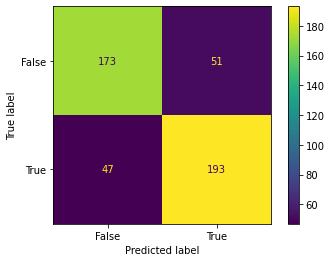

In [180]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## Generating AUC-ROC Curve

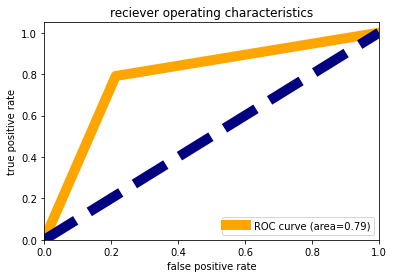

In [182]:
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Applying Decision Tree Classifier

In [204]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred_train=dt.predict(x_train)
dt_pred_test=dt.predict(x_test)
dt_acc_train=round(accuracy_score(y_train,dt_pred_train)*100,1)
dt_acc_test=round(accuracy_score(y_test,dt_pred_test)*100,1)
print("acc train",dt_acc_train)
print("acc test",dt_acc_test)

acc train 100.0
acc test 90.1


## Cross Validation Score

In [205]:
for i in range(4,15):
    cv_score=cross_val_score(dt,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",dt_acc_test)



At cv- 4

 cross validation score is- 68.73920552677029

 Accuracy score is- 90.1


At cv- 5

 cross validation score is- 72.72184776941984

 Accuracy score is- 90.1


At cv- 6

 cross validation score is- 80.18134715025907

 Accuracy score is- 90.1


At cv- 7

 cross validation score is- 83.4116739252691

 Accuracy score is- 90.1


At cv- 8

 cross validation score is- 85.61597661376923

 Accuracy score is- 90.1


At cv- 9

 cross validation score is- 90.58540034922262

 Accuracy score is- 90.1


At cv- 10

 cross validation score is- 87.12289147633976

 Accuracy score is- 90.1


At cv- 11

 cross validation score is- 88.55378428838144

 Accuracy score is- 90.1


At cv- 12

 cross validation score is- 89.16234887737477

 Accuracy score is- 90.1


At cv- 13

 cross validation score is- 89.33284404378496

 Accuracy score is- 90.1


At cv- 14

 cross validation score is- 90.36822615135868

 Accuracy score is- 90.1


So we are getting the least difference between cross_val_score and accuracy score at cv=14

In [207]:
cv_score_best_dt=cross_val_score(dt,x,y,cv=14).mean()*100
print("cross validation score is-",cv_score_best)
print("accuracy score for decision tree classifier model is-",dt_acc_test)

cross validation score is- 89.76216554529807
accuracy score for decision tree classifier model is- 90.1


## Confusion Matrix

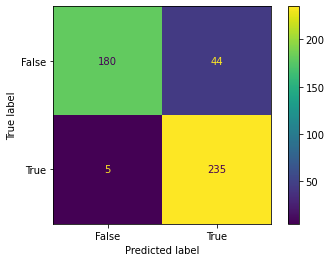

In [188]:
confusion_matrix = metrics.confusion_matrix(y_test, dt_pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## Generating AUC-ROC Curve

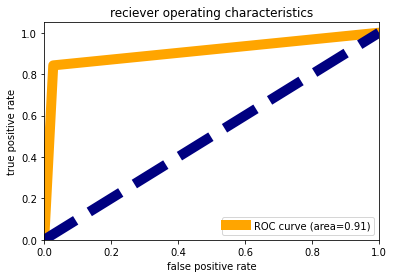

In [189]:
fpr,tpr,thresholds=roc_curve(dt_pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Applying Knn Classifier

In [208]:
from sklearn.neighbors import KNeighborsClassifier
max_ac=0
randomState=0
knn=KNeighborsClassifier()
for i in range(40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.25)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    
    print("\n\nAt random state:",i)
    print("\nTrain Accuracy- ",round(accuracy_score(y_train,pred_train)*100,1))
    print("\nTest Accuracy- ",round(accuracy_score(y_test,pred_test)*100,1))
        
print("\n\n Best accuracy at random state-",randomState)



At random state: 0

Train Accuracy-  88.1

Test Accuracy-  80.3


At random state: 1

Train Accuracy-  88.5

Test Accuracy-  81.3


At random state: 2

Train Accuracy-  88.8

Test Accuracy-  83.2


At random state: 3

Train Accuracy-  88.4

Test Accuracy-  79.1


At random state: 4

Train Accuracy-  89.1

Test Accuracy-  78.8


At random state: 5

Train Accuracy-  88.4

Test Accuracy-  79.8


At random state: 6

Train Accuracy-  87.9

Test Accuracy-  81.2


At random state: 7

Train Accuracy-  88.5

Test Accuracy-  81.2


At random state: 8

Train Accuracy-  88.3

Test Accuracy-  79.6


At random state: 9

Train Accuracy-  87.4

Test Accuracy-  80.7


At random state: 10

Train Accuracy-  88.1

Test Accuracy-  79.8


At random state: 11

Train Accuracy-  88.4

Test Accuracy-  78.1


At random state: 12

Train Accuracy-  88.3

Test Accuracy-  82.6


At random state: 13

Train Accuracy-  89.8

Test Accuracy-  81.0


At random state: 14

Train Accuracy-  88.0

Test Accuracy-  82.2


At 

In [209]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=39,test_size=0.20)
knn.fit(x_train,y_train)
pred_train=knn.predict(x_train)
pred_test=knn.predict(x_test)
knn_train_acc=round(accuracy_score(y_train,pred_train)*100,1)
knn_test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",knn_train_acc)
print("\nTest Accuracy- ",knn_test_acc)


Train Accuracy-  88.8

Test Accuracy-  86.9


## Cross Validation Score

In [210]:
for i in range(4,15):
    cv_score=cross_val_score(knn,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",knn_test_acc)



At cv- 4

 cross validation score is- 79.36096718480138

 Accuracy score is- 86.9


At cv- 5

 cross validation score is- 80.31205779399718

 Accuracy score is- 86.9


At cv- 6

 cross validation score is- 80.7426597582038

 Accuracy score is- 86.9


At cv- 7

 cross validation score is- 81.69236604281922

 Accuracy score is- 86.9


At cv- 8

 cross validation score is- 82.25405679513185

 Accuracy score is- 86.9


At cv- 9

 cross validation score is- 82.33945645944559

 Accuracy score is- 86.9


At cv- 10

 cross validation score is- 82.8565830721003

 Accuracy score is- 86.9


At cv- 11

 cross validation score is- 83.28860712746969

 Accuracy score is- 86.9


At cv- 12

 cross validation score is- 83.11744386873919

 Accuracy score is- 86.9


At cv- 13

 cross validation score is- 83.63495458781381

 Accuracy score is- 86.9


At cv- 14

 cross validation score is- 83.71824962186408

 Accuracy score is- 86.9


So we are getting the least difference between cross_val_score and accuracy score at cv=14

In [211]:
cv_score_best_knn=cross_val_score(knn,x,y,cv=14).mean()*100
print("cross validation score is-",cv_score_best_knn)
print("accuracy score for Knn classifier model is-",knn_test_acc)

cross validation score is- 83.71824962186408
accuracy score for Knn classifier model is- 86.9


## Confusion Matrix

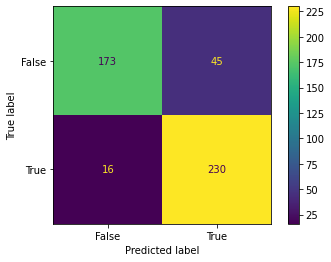

In [196]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## Generating AUC-ROC Curve

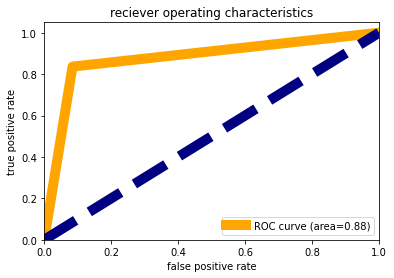

In [197]:
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Applying Random Forest Classifier

In [228]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
max_ac=0
randomState=0

for i in range(40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.25)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    
    print("\n\nAt random state:",i)
    print("\nTrain Accuracy- ",round(accuracy_score(y_train,pred_train)*100,1))
    print("\nTest Accuracy- ",round(accuracy_score(y_test,pred_test)*100,1))
        
print("\n\n Best accuracy at random state-",randomState)



At random state: 0

Train Accuracy-  100.0

Test Accuracy-  95.9


At random state: 1

Train Accuracy-  100.0

Test Accuracy-  97.9


At random state: 2

Train Accuracy-  100.0

Test Accuracy-  96.4


At random state: 3

Train Accuracy-  100.0

Test Accuracy-  96.4


At random state: 4

Train Accuracy-  100.0

Test Accuracy-  96.5


At random state: 5

Train Accuracy-  100.0

Test Accuracy-  97.1


At random state: 6

Train Accuracy-  100.0

Test Accuracy-  97.4


At random state: 7

Train Accuracy-  100.0

Test Accuracy-  97.1


At random state: 8

Train Accuracy-  100.0

Test Accuracy-  98.1


At random state: 9

Train Accuracy-  100.0

Test Accuracy-  97.1


At random state: 10

Train Accuracy-  100.0

Test Accuracy-  96.9


At random state: 11

Train Accuracy-  100.0

Test Accuracy-  98.3


At random state: 12

Train Accuracy-  100.0

Test Accuracy-  97.8


At random state: 13

Train Accuracy-  100.0

Test Accuracy-  94.6


At random state: 14

Train Accuracy-  100.0

Test Accura

In [229]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=37,test_size=0.20)
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
rf_train_acc=round(accuracy_score(y_train,pred_train)*100,1)
rf_test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",rf_train_acc)
print("\nTest Accuracy- ",rf_test_acc)


Train Accuracy-  100.0

Test Accuracy-  98.7


## Cross Validation Score

In [230]:
for i in range(4,15):
    cv_score=cross_val_score(rf,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",rf_test_acc)



At cv- 4

 cross validation score is- 72.15025906735751

 Accuracy score is- 98.7


At cv- 5

 cross validation score is- 77.60296417665897

 Accuracy score is- 98.7


At cv- 6

 cross validation score is- 81.26079447322971

 Accuracy score is- 98.7


At cv- 7

 cross validation score is- 88.07195825322712

 Accuracy score is- 98.7


At cv- 8

 cross validation score is- 92.487322515213

 Accuracy score is- 98.7


At cv- 9

 cross validation score is- 95.25415832989808

 Accuracy score is- 98.7


At cv- 10

 cross validation score is- 96.15819525302284

 Accuracy score is- 98.7


At cv- 11

 cross validation score is- 95.90139718101803

 Accuracy score is- 98.7


At cv- 12

 cross validation score is- 97.02072538860102

 Accuracy score is- 98.7


At cv- 13

 cross validation score is- 97.23857211146144

 Accuracy score is- 98.7


At cv- 14

 cross validation score is- 97.1942314713399

 Accuracy score is- 98.7


So we are getting the least difference between cross_val_score and accuracy score at cv=14

In [232]:
cv_score_best_rf=cross_val_score(rf,x,y,cv=14).mean()*100
print("cross validation score is-",cv_score_best_rf)
print("accuracy score for random forest classifier model is-",rf_test_acc)

cross validation score is- 97.5392479006937
accuracy score for random forest classifier model is- 98.7


## Generating Confusion Matrix

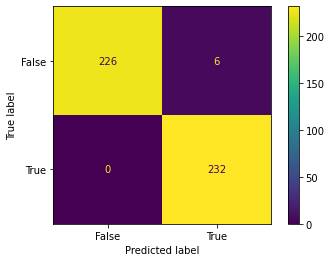

In [233]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## Generating AUC-ROC Curve

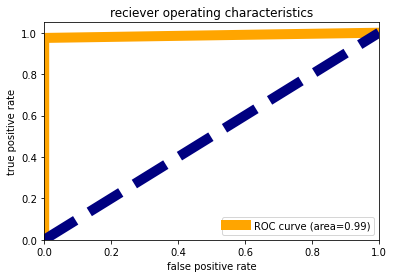

In [234]:
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Summary of all the models

In [235]:
models=['Logistic Regression','Decision Tree Classifier','Knn Classifier','Random Forest Classifier']
test_acc=[test_accuracy,dt_acc_test,knn_test_acc,rf_test_acc]
cv_score=[cv_score_best,cv_score_best_dt,cv_score_best_knn,cv_score_best_rf]
df=pd.DataFrame(list(zip(models,test_acc,cv_score)),columns=['Models','Test Accuracy','CV Score'])
df

,Models,Test Accuracy,CV Score
0,Logistic Regression,78.9,77.551343
1,Decision Tree Classifier,90.1,90.107964
2,Knn Classifier,86.9,83.718250
3,Random Forest Classifier,98.7,97.539248


## We will select Random Forest Classifier as our final model as it has highest accuracy and AUC-Roc curve has also maximum area covered.

## Hyperparameter Tuning on Random Forest Classifier

In [223]:
param_grid = {
    "n_estimators":[100,200,300],
    "max_depth":[10, 50, 100],
    "max_features":[6,8,10,12,14,16],
    'bootstrap': [True, False]
}

rf_reg = RandomForestClassifier()

rf_reg_tuned = GridSearchCV(estimator=rf_reg,
                            param_grid=param_grid,
                            cv=3,
                            n_jobs=-1,
                            verbose=2)

rf_reg_tuned.fit(x_train, y_train)
rf_reg_tuned.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


RandomForestClassifier(bootstrap=False, max_depth=50, max_features=6,
                       n_estimators=200)

In [227]:
rf1=RandomForestClassifier(n_estimators=200,max_depth=50,max_features=6,bootstrap=False)
rf1.fit(x_train,y_train)
pred_train=rf1.predict(x_train)
pred_test=rf1.predict(x_test)
train_acc=round(accuracy_score(y_train,pred_train)*100,1)
test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",train_acc)
print("\nTest Accuracy- ",test_acc)


Train Accuracy-  100.0

Test Accuracy-  98.1


There is hardly any change in accuracy so we will stick to our model previous to hyperparameter tuning. 

## Model Saving

In [236]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(rf, open(filename, 'wb'))